### Natural Language Processing Techniques (WordNet, TextBlob & Word Cloud)

In [1]:
# Import NLTK library
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Ekta
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ekta Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Ekta
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### WordNet

- It is a lexical database for English language. Part of NLTK Corpus used to fetch synonyms, antonyms, etc

In [2]:
# Check definition of the word using nltk
from nltk.corpus import wordnet
print(wordnet.synsets("Fun"))
# for words in wordnet.synsets("Fun"):
#     print(words)
one = wordnet.synsets("Fun")[3]
print(one.name())
print(one.definition())
print(one.examples())
print(one.lemma_names())

[Synset('fun.n.01'), Synset('fun.n.02'), Synset('fun.n.03'), Synset('playfulness.n.02')]
playfulness.n.02
a disposition to find (or make) causes for amusement
['her playfulness surprised me', 'he was fun to be with']
['playfulness', 'fun']


In [14]:
# Check meaning of the different definitions
for words in wordnet.synsets("book"):
    for lemma in words.lemmas():
        print(lemma)
        print("\n")

Lemma('book.n.01.book')


Lemma('book.n.02.book')


Lemma('book.n.02.volume')


Lemma('record.n.05.record')


Lemma('record.n.05.record_book')


Lemma('record.n.05.book')


Lemma('script.n.01.script')


Lemma('script.n.01.book')


Lemma('script.n.01.playscript')


Lemma('ledger.n.01.ledger')


Lemma('ledger.n.01.leger')


Lemma('ledger.n.01.account_book')


Lemma('ledger.n.01.book_of_account')


Lemma('ledger.n.01.book')


Lemma('book.n.06.book')


Lemma('book.n.07.book')


Lemma('book.n.07.rule_book')


Lemma('koran.n.01.Koran')


Lemma('koran.n.01.Quran')


Lemma('koran.n.01.al-Qur'an')


Lemma('koran.n.01.Book')


Lemma('bible.n.01.Bible')


Lemma('bible.n.01.Christian_Bible')


Lemma('bible.n.01.Book')


Lemma('bible.n.01.Good_Book')


Lemma('bible.n.01.Holy_Scripture')


Lemma('bible.n.01.Holy_Writ')


Lemma('bible.n.01.Scripture')


Lemma('bible.n.01.Word_of_God')


Lemma('bible.n.01.Word')


Lemma('book.n.10.book')


Lemma('book.n.11.book')


Lemma('book.v.01.book')


Lemma('res

In [17]:
# Get details for all meanings of a word
for words in wordnet.synsets("fun"):
    print(words.name())
    print(words.definition())
    print(words.examples())
    print('-----------------')
    for lemma in words.lemmas():
        print(lemma)
    print("\n")
    

fun.n.01
activities that are enjoyable or amusing
['I do it for the fun of it', 'he is fun to have around']
-----------------
Lemma('fun.n.01.fun')
Lemma('fun.n.01.merriment')
Lemma('fun.n.01.playfulness')


fun.n.02
verbal wit or mockery (often at another's expense but not to be taken seriously)
['he became a figure of fun', 'he said it in sport']
-----------------
Lemma('fun.n.02.fun')
Lemma('fun.n.02.play')
Lemma('fun.n.02.sport')


fun.n.03
violent and excited activity
['she asked for money and then the fun began', 'they began to fight like fun']
-----------------
Lemma('fun.n.03.fun')


playfulness.n.02
a disposition to find (or make) causes for amusement
['her playfulness surprised me', 'he was fun to be with']
-----------------
Lemma('playfulness.n.02.playfulness')
Lemma('playfulness.n.02.fun')




##### Hyponyms
- a word of more specific meaning than a general or superordinate term applicable to it. For example, spoon is a hyponym of cutlery.

##### Hypernyms
- a word with a broad meaning constituting a category into which words with more specific meanings fall; a superordinate. For example, colour is a hypernym of red.

In [18]:
# Fetch hypernym and hyponym
word = wordnet.synsets("College")[1]
print(word.hypernyms())
print(word.hyponyms())

[Synset('educational_institution.n.01')]
[Synset('business_college.n.01'), Synset('junior_college.n.01'), Synset('training_college.n.01')]


##### Synonyms

In [4]:
synonyms = []
for words in wordnet.synsets("Hard"):
    for lemma in words.lemmas():
        synonyms.append(lemma.name())
        

In [5]:
list(set(synonyms))

['hard',
 'operose',
 'gruelling',
 'heavily',
 'grueling',
 'surd',
 'toilsome',
 'voiceless',
 'difficult',
 'heavy',
 'concentrated',
 'arduous',
 'severe',
 'tough',
 'laborious',
 'unvoiced',
 'intemperate',
 'punishing',
 'strong',
 'severely',
 'firmly',
 'knockout',
 'backbreaking',
 'intemperately']

##### Antonyms

In [6]:
antonyms = []
for words in wordnet.synsets("Hard"):
    for lemma in words.lemmas():
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())
        

In [7]:
list(set(antonyms))

['soft', 'easy', 'voiced', 'lightly']

##### Similarity in words

In [8]:
# Fetch similarity between two words
word1 = wordnet.synsets("College")[0]
word2 = wordnet.synsets("Club")[0]
print(word1, '-->', word2)
print('Similarity: ', word1.wup_similarity(word2))

Synset('college.n.01') --> Synset('baseball_club.n.01')
Similarity:  0.5333333333333333


In [17]:
wordnet.synsets("College")

[Synset('college.n.01'), Synset('college.n.02'), Synset('college.n.03')]

In [9]:
word1 = wordnet.synsets("car")[0]
word2 = wordnet.synsets("driving")[0]
print(word1, '-->', word2)
print('Similarity: ', word1.wup_similarity(word2))

Synset('car.n.01') --> Synset('drive.n.06')
Similarity:  0.08695652173913043


#### TextBlob

- Provides access to common text propcessing operations through a familiar interface

In [4]:
from textblob import TextBlob
nltk.download('brown')

[nltk_data] Downloading package brown to C:\Users\Ekta
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [15]:
my_example = TextBlob("We are studying natural language processing tehniques on a Monday afternoon at SDBI college ax.")

In [13]:
# Part of speech tags
my_example.tags

[('We', 'PRP'),
 ('are', 'VBP'),
 ('studying', 'VBG'),
 ('natural', 'JJ'),
 ('language', 'NN'),
 ('processing', 'NN'),
 ('tehniques', 'NNS'),
 ('on', 'IN'),
 ('a', 'DT'),
 ('Monday', 'NNP'),
 ('afternoon', 'NN'),
 ('at', 'IN'),
 ('SDBI', 'NNP'),
 ('college', 'NN')]

In [14]:
# Extract Noun Phrases
my_example.noun_phrases

WordList(['natural language processing tehniques', 'sdbi'])

##### Sentiment Analysis 
- Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement
- Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information
- Polarity ranges from -1.0 to 1.0 and subjectivity ranges from 0 to 1, where 0 means objective, 1.0 is subjective


In [5]:
cred = TextBlob("Never mess with Indians especially on your soil")
cred.sentiment

Sentiment(polarity=0.04375, subjectivity=0.5875)

In [6]:
cred = TextBlob("My entire last year has been ruined because of my manager and this has deeply impacted my mental health")
cred.sentiment

Sentiment(polarity=-0.025, subjectivity=0.3229166666666667)

In [9]:
# Tokenization
my_example.words 
#my_example.sentences

WordList(['We', 'are', 'studying', 'natural', 'language', 'processing', 'tehniques', 'on', 'a', 'Monday', 'afternoon', 'at', 'SDBI', 'college'])

In [17]:
# Find the plurals of all word tokens
[i.pluralize() for i in my_example.words] 
# Find the singular of all word tokens

[i.singularize() for i in my_example.words] 


['We',
 'are',
 'studying',
 'natural',
 'language',
 'processing',
 'tehnique',
 'on',
 'a',
 'Monday',
 'afternoon',
 'at',
 'SDBI',
 'college',
 'ax']

##### Spell Correction

In [27]:
quote = TextBlob("Gifty someehow managed to reich Colllege on time tudayy")
quote.correct()

TextBlob("Fifty somehow managed to rich College on time today")

In [28]:
print(quote[0:10]) # fetch characters by position
print(quote.upper()) # convert everything to uppercase
print(quote.lower()) # convert everything to lowercase

Gifty some
GIFTY SOMEEHOW MANAGED TO REICH COLLLEGE ON TIME TUDAYY
gifty someehow managed to reich colllege on time tudayy


##### n-grams

In [31]:
quote.ngrams(n = 3)

[WordList(['Gifty', 'someehow', 'managed']),
 WordList(['someehow', 'managed', 'to']),
 WordList(['managed', 'to', 'reich']),
 WordList(['to', 'reich', 'Colllege']),
 WordList(['reich', 'Colllege', 'on']),
 WordList(['Colllege', 'on', 'time']),
 WordList(['on', 'time', 'tudayy'])]

#### Word Cloud

- Data visualization technique
- Words from a given text display on the main chart, these include the most frequent / essential words diplayed in a larger and bolder font

###### Advantages
- Fast, engaging and easy to understand
- Casual and visually appealing

###### Disadvantages
- Non-perfect for non-clean data
- Lack context of words


###### Properties
- font_path: specifices the path for the fonts we want to use
- width: specifices the width of the canvas
- height : specifices the height of the canvas
- min_font_size : specifices the smallest font size to use
- max_font_size : specifices the largest font size to use

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [33]:
text = """
Tesla CEO Elon Musk on Thursday unveiled a humanoid robot called the Tesla Bot that runs on the same AI used by Tesla's fleet of autonomous vehicles. A functioning version of the robot didn't make an appearance during Musk's reveal, though a slightly bizarre dance by a performer dressed like a Tesla Bot did. The unexpected reveal came at the end of Tesla's AI Day presentation, with Musk providing few details about the slightly creepy, Slenderman-like robot beyond a few PowerPoint slides. The 5-foot-8-inch robot is expected to weigh in at 125 pounds and be built from "lightweight materials," he said. Its head will be kitted out with the autopilot cameras used by Tesla's vehicles to sense the environment and will contain a screen to display information. Internally, it will be operating via Tesla's Full Self-Driving computer. "It's intended to be friendly," Musk joked, "and navigate through a world built for humans."
"""

In [45]:
#stopwords=set(stopwords)
wordcloud = WordCloud(background_color="white").generate(text)

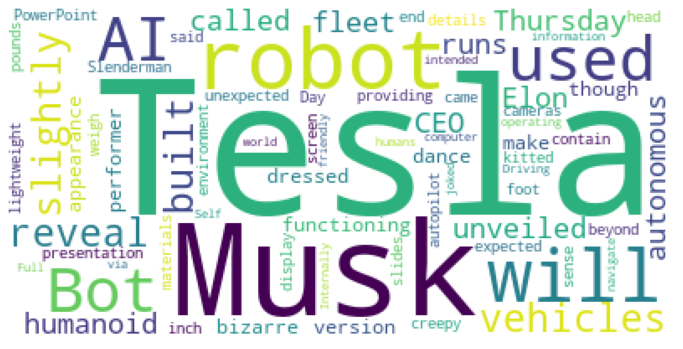

In [46]:
# Plot the wordcloud:
plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
# Remove axis values
plt.axis("off")
plt.show()